# Financial News Analysis using NLP 

**About this file**


This dataset contains the sentiments for financial news headlines from the perspective of a retail investor. Further details about the dataset can be found in: Malo, P., Sinha, A., Takala, P., Korhonen, P. and Wallenius, J. (2014): “Good debt or bad debt: Detecting semantic orientations in economic texts.” Journal of the American Society for Information Science and Technology.

### NLP
Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data.

NLP is currently the focus of significant interest in the machine learning community. Some of the use cases for NLP are listed here:

    -- Chatbots
    -- Search(text and Audio)
    -- Text Classification
    -- Sentiment Analysis
    -- Recomendation System
    -- Quesstion Answering
    -- Speech recognation
    -- NLU (Natural Language Understanding)
    -- NLG ( Natural Language Generation)


You encounter many of these use cases in everyday life : when you visit web pages or perform an online search for books, or recommendation regarding movies

**NLP Techniques**

The earliest approach for solving NLP task involves rule-based approachers, which dominated the indusytry for decades. Examples of techniques using rule based approaches include Regular Expressions (RegExs) and Context Free Grammars (CFGs). RegExs are sometimes used in order to remove HTML tags from text that has been scraped from a web page or uwanted special characters from a document.

The second approach involved training a machine learning model with some data that is based on some user defined features. This technique requires a considerable amount of features engineering ( a nontrivial task), and includes analyzing the text to remove undersired and superfluous content(including stop words), as well as transforming the word (e.g., converting upercase to lowercase).

The most recent approach involves deep learning, whereby a neural network learns the features instead of relying on human to perform feature engineering. One of the key ideas involves mapping words to numbers, which enables us to map sentence to vector of number. After transforming documents to vector, we can perform a myriad of operations on those vector. For example we use the notion of vector space to define vector space model, where the distance between two vector can be measured by the angle between them (related to cosine similarity). If two vector are closed to each other, then it's likelier that the coresponding sentence are similar meaning. Their similarity is based on the distributional hypothesis, which asserts that words in the same contexts tent to have similar meaning.The NLP models that use deep learning can comprise CNNs, RNNs, LSTMs, and bidirectional LSTMs.

**This work tries to classifying sentiment from financial news using Combination Doc2vec and LSTM**

### What is Sentimen Analysis ?
Sentiment analysis refers to the use of natural language processing, text analysis, computational linguistics, and biometrics to systematically identify, extract, quantify, and study affective states and subjective information. Sentiment Analysis [2]: the process of understanding if a given text is talking positively or negatively about a given subject, aiming for brand monitoring.



## Different Levels of Analysis

## Document level:

The task at this level is to classify whether a whole opinion document expresses a positive or negative sentiment (Pang, Lee and Vaithyanathan, 2002; Turney, 2002). For example, given a product review, the system determines whether the review expresses an overall positive or negative opinion about the product. This task is commonly known as document-level sentiment classification. This level of analysis assumes that each document expresses opinions on a single entity (e.g., a single product). Thus, it is not applicable to documents which evaluate or compare multiple entities.

## Sentence level:

The task at this level goes to the sentences and determines whether each sentence expressed a positive, negative, or neutral opinion. Neutral usually means no opinion. This level of analysis is closely related to subjectivity classification (Wiebe, Bruce and O'Hara, 1999), which distinguishes sentences (called objective sentences) that express factual information from sentences (called subjective sentences) that express subjective views and opinions. However, we should note that subjectivity is not equivalent to sentiment as many objective sentences can imply opinions, e.g., “We bought the car last month and the windshield wiper has fallen off.” Researchers have also analyzed clauses (Wilson, Wiebe and Hwa, 2004), but the clause level is still not enough, e.g., “Apple is doing very well in this lousy economy.”

## Entity and Aspect level:

Both the document level and the sentence level analyses do not discover what exactly people liked and did not like. Aspect level performs finer-grained analysis. Aspect level was earlier called feature level (feature-based opinion mining and summarization) (Hu and Liu, 2004). Instead of looking at language constructs (documents, paragraphs, sentences, clauses or phrases), aspect level directly looks at the opinion itself. It is based on the idea that an opinion consists of a sentiment (positive or negative) and a target (of opinion). An opinion without its target being identified is of limited use. Realizing the importance of opinion targets also helps us understand the sentiment analysis problem better.

### What is LSTM ?
Long Short Term Memory (LSTM) is a special kind of Recurrent Neural Network (RNN), capable of learning long-term dependencies. These long-term dependencies have a great influence on the meaning and overall polarity of a document. Long short-term memory networks (LSTM) address this long-term dependency problem by introducing a memory into the network. It was first introduced by Hochreiter & Schmidhuber.

The LSTM architecture has a range of repeated modules for each time step as in a standard RNN. At each time step, the output of the module is controlled by a set of gates, as a function of the old hidden state ℎ𝑡−1 and the input at the current time step 𝑥𝑡 : the forget gate 𝑓𝑡, the input gate 𝑖𝑡 , and the output gate 𝑂𝑡 . These gates collectively decide how to update the current memory cell 𝐶𝑡 and the current hidden state ℎ𝑡 . The LSTM transition functions are defined as follows:

    𝑖𝑡=(𝑊𝑖[ℎ𝑡−1,𝑥𝑡]+𝑏𝑖)

    𝐶´𝑡=𝑡𝑎𝑛ℎ(𝑊𝑐[ℎ𝑡−1,𝑥𝑡]+𝑏𝐶)

    𝑓𝑡=(𝑊𝑓[ℎ𝑡−1,𝑥𝑡]+𝑏𝑓)

    𝑂𝑡=(𝑊𝑜[ℎ𝑡−1,𝑥𝑡]+𝑏𝑜)

    𝐶𝑡= 𝑓𝑡∗𝐶𝑡−1+𝑖𝑡∗𝐶´𝑡

Here 𝜎 is logistic sigmoid function that has an output in 𝑛 [0,1] ,tanh denotes the hyperbolic tangent function that has an output ℎ 𝑖𝑛 [−1,1], and ∗ denotes the pointwise multiplication.

As I mentioned before to deal with Deep learning we have to map sentence to vector of number. In this work inspired by [3] Doc2vec as the embedding used for extracting information context. The Doc2vec is an unsupervised algorithm that learns fixed-length feature representations from variable-length pieces of texts such as sentences, paragraphs, and documents.

# Let's Explore the given theory concepts

In [1]:
## Import Libraries
import pandas as pd # Dataframe Handling
import numpy as np # Numirical calculations and mapping
from tqdm import tqdm # 
from keras.preprocessing.text import Tokenizer # To tocanised the data
tqdm.pandas(desc="progress-bar") 
from gensim.models import Doc2Vec # Doc Vector model
from sklearn import utils # It helps to generate the charts
from sklearn.model_selection import train_test_split # To split the data
from keras.preprocessing.sequence import pad_sequences # To specify the length of word or sentence
import gensim # to represant the data in vectors
from sklearn.linear_model import LogisticRegression # Logistic regression
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns # To visualised the data
import matplotlib.pyplot as plt # To visualised the data

C:\ProgramData\Anaconda3\lib\site-packages\tqdm\std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
# Load and read the data
df = pd.read_csv('all-data.csv',delimiter=',',encoding='latin-1')
df.head() # For top 5 rows

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [3]:
# Rename the column becxause the length of name of column in large
df = df.rename(columns={'neutral':'sentiment','According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .':'Message'})

In [4]:
# Dimension of the data
df.shape

(4845, 2)

In [5]:
# Find the len of the message
df.index = range(4845)
df['Message'].apply(lambda x: len(x.split(' '))).sum()

111964

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


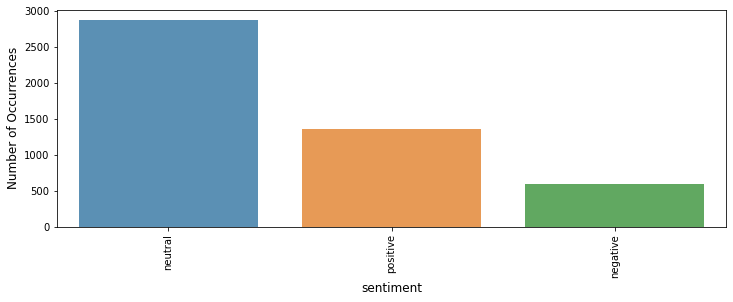

In [6]:
# VISUALIZING THE DATA
cnt_pro = df['sentiment'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('sentiment', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [7]:
#Convert sting to numeric
sentiment  = {'positive': 0,'neutral': 1,'negative':2} 

df.sentiment = [sentiment[item] for item in df.sentiment] 
print(df)

      sentiment                                            Message
0             1  Technopolis plans to develop in stages an area...
1             2  The international electronic industry company ...
2             0  With the new production plant the company woul...
3             0  According to the company 's updated strategy f...
4             0  FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
...         ...                                                ...
4840          2  LONDON MarketWatch -- Share prices ended lower...
4841          1  Rinkuskiai 's beer sales fell by 6.5 per cent ...
4842          2  Operating profit fell to EUR 35.4 mn from EUR ...
4843          2  Net sales of the Paper segment decreased to EU...
4844          2  Sales in Finland decreased by 10.5 % in Januar...

[4845 rows x 2 columns]


In [8]:
def print_message(index):
    example = df[df.index == index][['Message', 'sentiment']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Message:', example[1])
print_message(12)

Finnish Talentum reports its operating profit increased to EUR 20.5 mn in 2005 from EUR 9.3 mn in 2004 , and net sales totaled EUR 103.3 mn , up from EUR 96.4 mn .
Message: 0


In [9]:
# Print first message
print_message(0)

Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .
Message: 1


In [10]:
# To clean the message
from bs4 import BeautifulSoup # it helps to clean the sentence
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    return text
df['Message'] = df['Message'].apply(cleanText)

In [11]:
df['Message'] = df['Message'].apply(cleanText)
train, test = train_test_split(df, test_size=0.000001 , random_state=42)
import nltk # natural language tool kit helps to tocanised the data
from nltk.corpus import stopwords
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            #if len(word) < 0:
            if len(word) <= 0:
                continue
            tokens.append(word.lower())
    return tokens
train_tagged = train.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['Message']), tags=[r.sentiment]), axis=1)
test_tagged = test.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['Message']), tags=[r.sentiment]), axis=1)

# The maximum number of words to be used. (most frequent)
max_fatures = 500000

# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 50

#tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer = Tokenizer(num_words=max_fatures, split=' ', filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['Message'].values)
X = tokenizer.texts_to_sequences(df['Message'].values)
X = pad_sequences(X)
print('Found %s unique tokens.' % len(X))

Found 4845 unique tokens.


In [12]:
# make tose words in numirical dots
X = tokenizer.texts_to_sequences(df['Message'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (4845, 50)


In [13]:
#train_tagged.values[2173]
train_tagged.values

array([TaggedDocument(words=['upm-kymmene', 'has', 'generated', 'four', 'consecutive', 'quarters', 'of', 'positive', 'free', 'cash', 'flow', '.'], tags=[0]),
       TaggedDocument(words=['in', 'the', 'method', 'the', 'smelt', 'spouts', '2', 'are', 'separated', 'from', 'the', 'working', 'area', '6', 'by', 'a', 'shielding', 'wall', '8', ',', '10', 'arranged', 'movable', 'in', 'relation', 'to', 'the', 'smelt', 'spouts', '.'], tags=[1]),
       TaggedDocument(words=['``', 'that', "'s", 'a', 'very', 'high', 'figure', 'on', 'the', 'european', 'scale', ',', '``', 'noop', 'said', ',', 'recalling', 'however', 'that', 'this', 'also', 'includes', 'beer', 'bought', 'by', 'finnish', 'tourists', '.'], tags=[1]),
       ...,
       TaggedDocument(words=['proha', 'plc', '(', 'euronet', ':7327', ')', 'announced', 'today', '(', '19', 'may', ')', 'that', 'its', 'fully-owned', 'subsidiary', ',', 'safran', 'software', 'solutions', 'as', ',', 'has', 'agreed', 'to', 'sell', 'its', '49', '%', 'share', 'of', '

In [14]:
# apply D2V model
d2v_model = Doc2Vec(dm=1,vector_size=20, dm_mean=1, window=8, min_count=1, workers=1, alpha=0.065, min_alpha=0.065,epochs=5)
d2v_model.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████████████████████████████████████████████████████████████████████| 4844/4844 [00:00<00:00, 404169.74it/s]


In [15]:
%%time
for epoch in range(30):
    d2v_model.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    d2v_model.alpha -= 0.002
    d2v_model.min_alpha = d2v_model.alpha

100%|██████████████████████████████████████████████████████████████████████████| 4844/4844 [00:00<00:00, 972953.19it/s]


Wall time: 15.7 s


In [16]:
print(d2v_model)

Doc2Vec<dm/m,d20,n5,w8,s0.001>


In [17]:
len(d2v_model.wv)

11682

In [18]:
# save the vectors in a new matrix
embedding_matrix = np.zeros((len(d2v_model.wv)+ 1, 20))

for i, vec in enumerate(d2v_model.docvecs.vectors):
    while i in vec <= 1000:
    #print(i)
    #print(model.docvecs)
          embedding_matrix[i]=vec
    #print(vec)
    #print(vec[i])

<ipython-input-18-95e16a1341c7>:4: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  for i, vec in enumerate(d2v_model.docvecs.vectors):


In [19]:
# Top 10 with profit word
d2v_model.wv.most_similar(positive=['profit'], topn=10)

[('loss', 0.9108386039733887),
 ('sales', 0.7973217964172363),
 ('profits', 0.7576896548271179),
 ('turnover', 0.746253490447998),
 ('income', 0.7415260076522827),
 ('pharma', 0.692173182964325),
 ('larger-than-epected', 0.6914839148521423),
 ('ns1v', 0.6873822808265686),
 ('originally', 0.6847700476646423),
 ('bill', 0.680260419845581)]

In [20]:
# Top 10 with investment word
d2v_model.wv.most_similar(positive=['investment'], topn=10)


[('appeal', 0.7885555624961853),
 ('property', 0.7696755528450012),
 ('karhinen', 0.7405270338058472),
 ('estate', 0.7381441593170166),
 ('organization', 0.7297702431678772),
 ('equity', 0.7217682003974915),
 ('warnings', 0.7113656997680664),
 ('rohwedder', 0.709439754486084),
 ('non-restricted', 0.7023128867149353),
 ('detailing', 0.7015187740325928)]

In [21]:
# Top 10 with broke word
d2v_model.wv.most_similar(positive=['broke'], topn=10)

[('mold', 0.9611244797706604),
 ('gather', 0.8924813270568848),
 ('macro-economic', 0.8824651837348938),
 ('mursula', 0.8562044501304626),
 ('biscuits', 0.8543246388435364),
 ('aptly', 0.8493544459342957),
 ('else', 0.83978670835495),
 ('breakfast', 0.8378297686576843),
 ('umbrellas', 0.8366750478744507),
 ('campbell', 0.8338345289230347)]

In [22]:
#Plot Similarity word in Doc2vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in d2v_model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=250, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

# Create the LSTM Model

In [24]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding


# init layer
model = Sequential()

# emmbed word vectors
model.add(Embedding(len(d2v_model.wv)+1,20,input_length=X.shape[1],weights=[embedding_matrix],trainable=True))

# learn the correlations
def split_input(sequence):
     return sequence[:-1], tf.reshape(sequence[1:], (-1,1))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(3,activation="softmax"))

# output model skeleton
model.summary()
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 20)            233660    
_________________________________________________________________
lstm (LSTM)                  (None, 50)                14200     
_________________________________________________________________
dense (Dense)                (None, 3)                 153       
Total params: 248,013
Trainable params: 248,013
Non-trainable params: 0
_________________________________________________________________


pip install pydot

In [29]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


pip install graphviz

In [30]:
# to Train the model split the datapoints
Y = pd.get_dummies(df['sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.15, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(4118, 50) (4118, 3)
(727, 50) (727, 3)


In [31]:
# Set the batch size

batch_size = 32 # 32 batches are made
# Train those 32 batches separetly and check there accurecy
history=model.fit(X_train, Y_train, epochs =50, batch_size=batch_size, verbose = 2) 

Epoch 1/50
129/129 - 10s - loss: 0.5590 - acc: 0.5954
Epoch 2/50
129/129 - 3s - loss: 0.4324 - acc: 0.6858
Epoch 3/50
129/129 - 3s - loss: 0.3113 - acc: 0.7817
Epoch 4/50
129/129 - 3s - loss: 0.2439 - acc: 0.8278
Epoch 5/50
129/129 - 3s - loss: 0.1887 - acc: 0.8749
Epoch 6/50
129/129 - 4s - loss: 0.1404 - acc: 0.9271
Epoch 7/50
129/129 - 4s - loss: 0.0899 - acc: 0.9592
Epoch 8/50
129/129 - 4s - loss: 0.0560 - acc: 0.9784
Epoch 9/50
129/129 - 4s - loss: 0.0407 - acc: 0.9828
Epoch 10/50
129/129 - 4s - loss: 0.0304 - acc: 0.9866
Epoch 11/50
129/129 - 4s - loss: 0.0276 - acc: 0.9879
Epoch 12/50
129/129 - 3s - loss: 0.0244 - acc: 0.9900
Epoch 13/50
129/129 - 3s - loss: 0.0152 - acc: 0.9947
Epoch 14/50
129/129 - 3s - loss: 0.0324 - acc: 0.9857
Epoch 15/50
129/129 - 3s - loss: 0.0218 - acc: 0.9913
Epoch 16/50
129/129 - 4s - loss: 0.0123 - acc: 0.9956
Epoch 17/50
129/129 - 3s - loss: 0.0138 - acc: 0.9942
Epoch 18/50
129/129 - 3s - loss: 0.0094 - acc: 0.9976
Epoch 19/50
129/129 - 3s - loss: 0.0

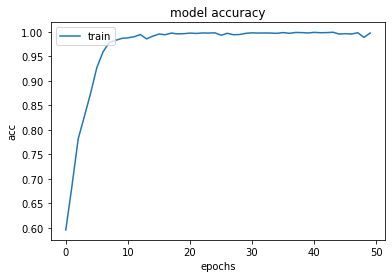

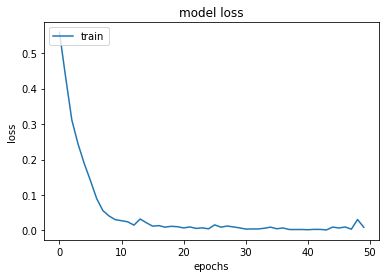

<Figure size 432x288 with 0 Axes>

In [32]:
# Plot the results (Accurecy and loss)

plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_accuracy.png')

# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_loss.png')

In [33]:
# evaluate the model
_, train_acc = model.evaluate(X_train, Y_train, verbose=2)
_, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('Train: %.3f, Test: %.4f' % (train_acc, test_acc))

129/129 - 2s - loss: 0.0043 - acc: 0.9988
23/23 - 0s - loss: 1.1497 - acc: 0.7166
Train: 0.999, Test: 0.7166


In [34]:
# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
print(yhat_probs)
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)
print(yhat_classes)
# reduce to 1d array
#yhat_probs = yhat_probs[:, 0]
#yhat_classes = yhat_classes[:, 1

[[4.3916603e-07 9.9999940e-01 1.1227933e-07]
 [9.9999905e-01 1.1340623e-07 8.9236471e-07]
 [9.1908396e-07 9.9999869e-01 3.1600985e-07]
 ...
 [4.7750432e-02 5.0357246e-04 9.5174599e-01]
 [1.1223220e-06 9.9999869e-01 2.9577805e-07]
 [9.9974710e-01 2.1984818e-04 3.3064316e-05]]


C:\Users\abc\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[1 0 1 0 1 1 1 1 1 1 1 1 0 2 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 2 1 1 1 2 1 1 0
 0 1 1 0 1 2 1 0 1 1 1 0 1 2 1 0 2 1 0 1 1 0 1 0 0 0 0 1 1 1 1 0 2 1 0 0 1
 0 1 1 1 1 0 1 2 0 1 0 0 1 0 1 0 0 1 1 2 1 1 0 1 0 1 2 1 1 2 0 1 1 1 2 1 1
 1 2 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 2 1 0 1 0 1 1 1 1 0 1 0 1 1 2 1
 0 1 1 1 1 1 1 0 0 1 2 2 0 1 1 0 1 0 1 2 1 0 1 0 0 1 0 2 0 0 1 0 0 0 0 1 1
 2 1 2 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 2 1 0 0 0
 1 0 1 1 1 0 1 1 1 0 0 1 2 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 2 0 1 1 1
 1 1 0 1 0 2 2 0 1 1 1 1 1 2 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 0 1 0 2 2 1
 1 1 0 1 0 1 0 1 1 2 1 0 1 0 1 2 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1
 1 0 0 1 0 0 1 0 0 1 0 1 2 1 0 1 1 0 1 0 2 1 1 0 1 2 0 1 1 2 1 0 0 0 2 1 0
 0 0 1 1 1 1 1 1 0 0 0 0 2 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 2 2 1
 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 2 1 1 1 0 1 0 0 1 1 1 0 0 0 2 1 1 0 1 1
 0 1 1 2 0 2 1 1 1 0 1 0 2 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1
 0 1 0 0 1 2 1 1 0 0 1 0 

In [35]:
import numpy as np
rounded_labels=np.argmax(Y_test, axis=1)
rounded_labels

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 1, 0, 0, 2, 2, 1,
       0, 0, 1, 0, 1, 0, 0, 2, 1, 1, 0, 2, 1, 0, 2, 0, 1, 1, 0, 1, 2, 1,
       0, 1, 1, 1, 0, 0, 2, 1, 0, 2, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 2, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 2, 0,
       1, 1, 0, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 1, 0, 0, 1, 0, 2, 1,
       2, 0, 1, 1, 0, 2, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1,
       0, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 0, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1,
       1, 2, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       2, 1, 2, 1, 1, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 2, 1, 0, 1, 0, 2, 2, 1, 1, 1, 0, 1, 0,

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(rounded_labels, yhat_classes)
cm

array([[149,  64,   2],
       [ 85, 323,  18],
       [ 15,  22,  49]], dtype=int64)

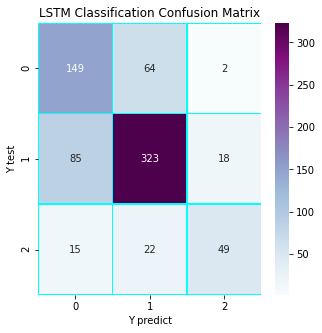

In [37]:
# The confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

lstm_val = confusion_matrix(rounded_labels, yhat_classes)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(lstm_val, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="BuPu")
plt.title('LSTM Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [38]:
# Validation
validation_size = 610

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,acc = model.evaluate(X_test, Y_test, verbose = 1, batch_size = batch_size)

print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

4/4 [==============================] - 0s 11ms/step - loss: 1.0998 - acc: 0.7607
score: 1.10
acc: 0.76


In [39]:
# Save the model
model.save('Mymodel.h5')

In [40]:
# Test with new and different data set aside from the data to build the model.
# Test 1
message = ['Congratulations! you have won a $1,000 Walmart gift card']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0','1','2']
print(pred, labels[np.argmax(pred)])

[[9.8723638e-01 4.1791354e-04 1.2345733e-02]] 0


In [41]:
# test 2
message = ['such massive asteroid hit will certainly create new business opportunities']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0','1','2']
print(pred, labels[np.argmax(pred)])

[[9.9999762e-01 1.0559489e-06 1.3480803e-06]] 0


In [42]:
# test 4
message = ['so does anyone else not open Snapchat anymore ? or is it just me ... ugh this so sad.']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0','1','2']
print(pred, labels[np.argmax(pred)])

[[7.2783207e-10 1.0000000e+00 4.0219553e-10]] 1


In [43]:
# Test 5
message = ['@elonmusk had a terrible experience with a very pushy sales guy from tesla Stanford shop while shopping for model x']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0','1','2']
print(pred, labels[np.argmax(pred)])

[[9.9952853e-01 3.7651797e-04 9.5002018e-05]] 0


In [44]:
# test 6
message = ['The local electronics industry is expected to remain stable amid layoff concerns surrounding Japanese electronics giants operating in the country, an official says.']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0','1','2']
print(pred, labels[np.argmax(pred)])

[[6.4313441e-05 9.9993515e-01 4.8162610e-07]] 1


In [45]:
# Test 7
message = ['The local electronics industry is amid layoff concerns and last year has laid off tens of employees']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0','1','2']
print(pred, labels[np.argmax(pred)])


[[1.7219327e-06 2.2136858e-07 9.9999809e-01]] 2


**References**

    [1] Artificial Inteligence, Machine Learning and Deep Learning by Mercury Learning and Informarion (Book)
    [2] Source Information of NLP :https://monkeylearn.com/what-is-text-classification/
    [3] Parameter doc2vec and LSTM inspired by : https://dl.acm.org/doi/10.1145/3406601.3406624
    [4] (Bing Liu. Sentiment Analysis and Opinion Mining, Morgan & Claypool Publishers, May 2012.)

**Tips**
    There are some changes in `Doc2Vec` so check youre python version and work on it

In [ ]:
# Learning Continued